In [1]:
import synthx as sx

### with intervention effect

In [2]:
df = sx.sample(
    n_units=200,
    n_time=50,
    n_observed_covariates=3,
    n_unobserved_covariates=2,
    intervention_units=[1, 2],
    intervention_time=40,
    intervention_effect=1.03,
    noise_effect=0.1,
    scale=2000,
    seed=42,
)

In [3]:
dataset = sx.Dataset(
    df,
    unit_column='unit',
    time_column='time',
    y_column='y',
    covariate_columns=['covariate_1', 'covariate_2', 'covariate_3'],
    intervention_units=[1, 2],
    intervention_time=40,
    validation_time=35,
)

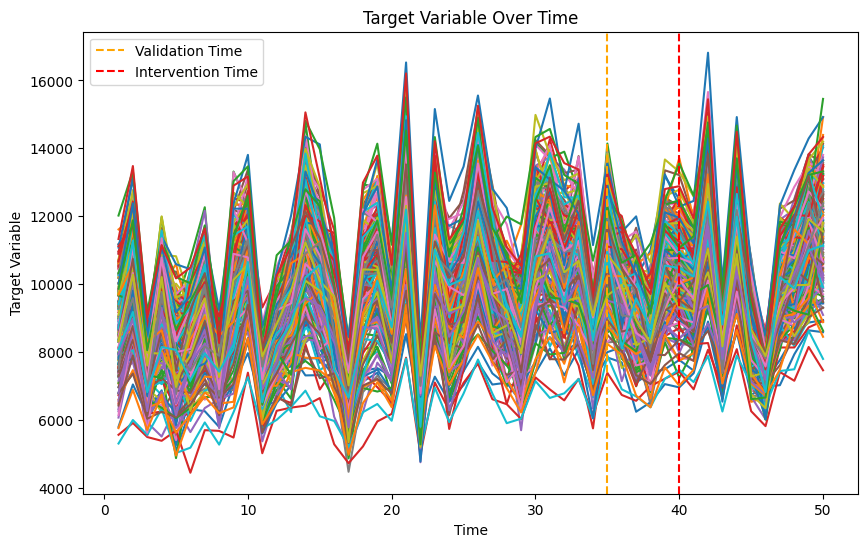

In [4]:
dataset.plot()

In [5]:
sc = sx.synthetic_control(dataset)

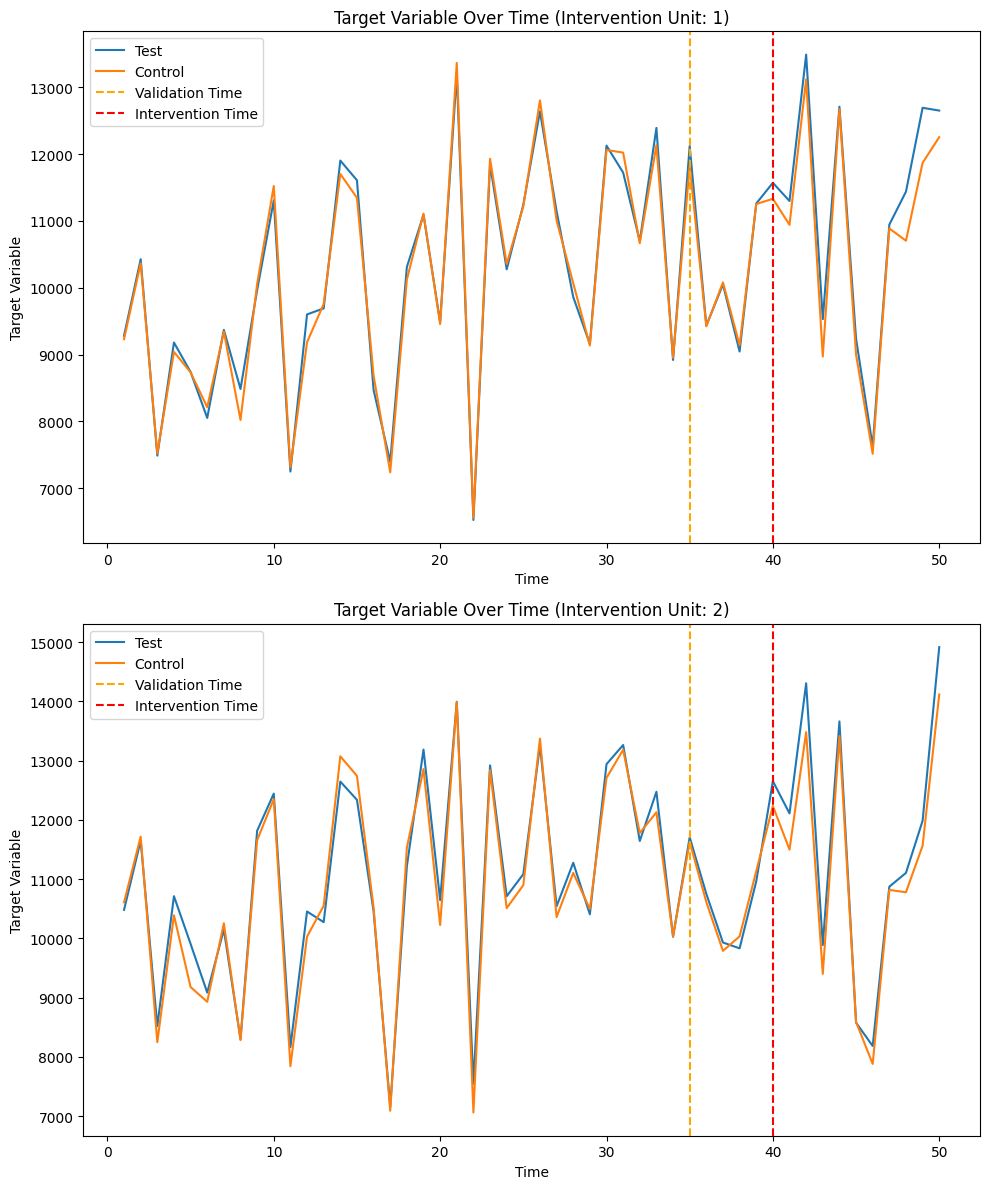

In [6]:
sc.plot()

In [7]:
sc.estimate_effects()

[0.03373079319135724, 0.028791261098040494]

In [8]:
sc.validation_differences()

[0.0019489751221665518, -0.008759085248505754]

In [9]:
sc.paired_ttest()

[{'intervention_unit': 1,
  'p_value_in_training': 0.5532140211726362,
  'p_value_in_intervention': 0.0011196690939868196,
  'p_value': 0.00698808961211537},
 {'intervention_unit': 2,
  'p_value_in_training': 0.04429880077662738,
  'p_value_in_intervention': 0.000514053875096227,
  'p_value': 0.00043760897150663146}]

### without intervention effect

In [10]:
df = sx.sample(
    n_units=200,
    n_time=50,
    n_observed_covariates=3,
    n_unobserved_covariates=2,
    intervention_units=[1, 2],
    intervention_time=40,
    intervention_effect=1,
    noise_effect=0.1,
    scale=2000,
    seed=42,
)

In [11]:
dataset = sx.Dataset(
    df,
    unit_column='unit',
    time_column='time',
    y_column='y',
    covariate_columns=['covariate_1', 'covariate_2', 'covariate_3'],
    intervention_units=[1, 2],
    intervention_time=40,
    validation_time=35,
)

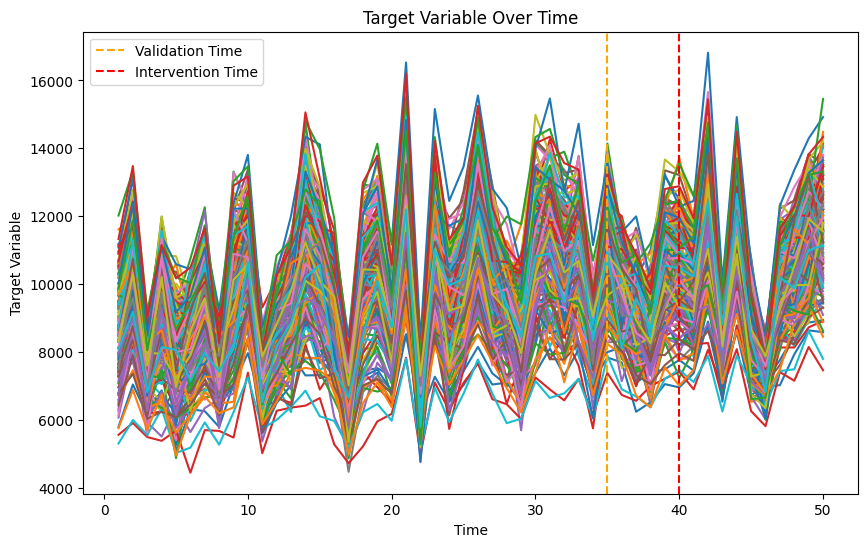

In [12]:
dataset.plot()

In [13]:
sc = sx.synthetic_control(dataset)

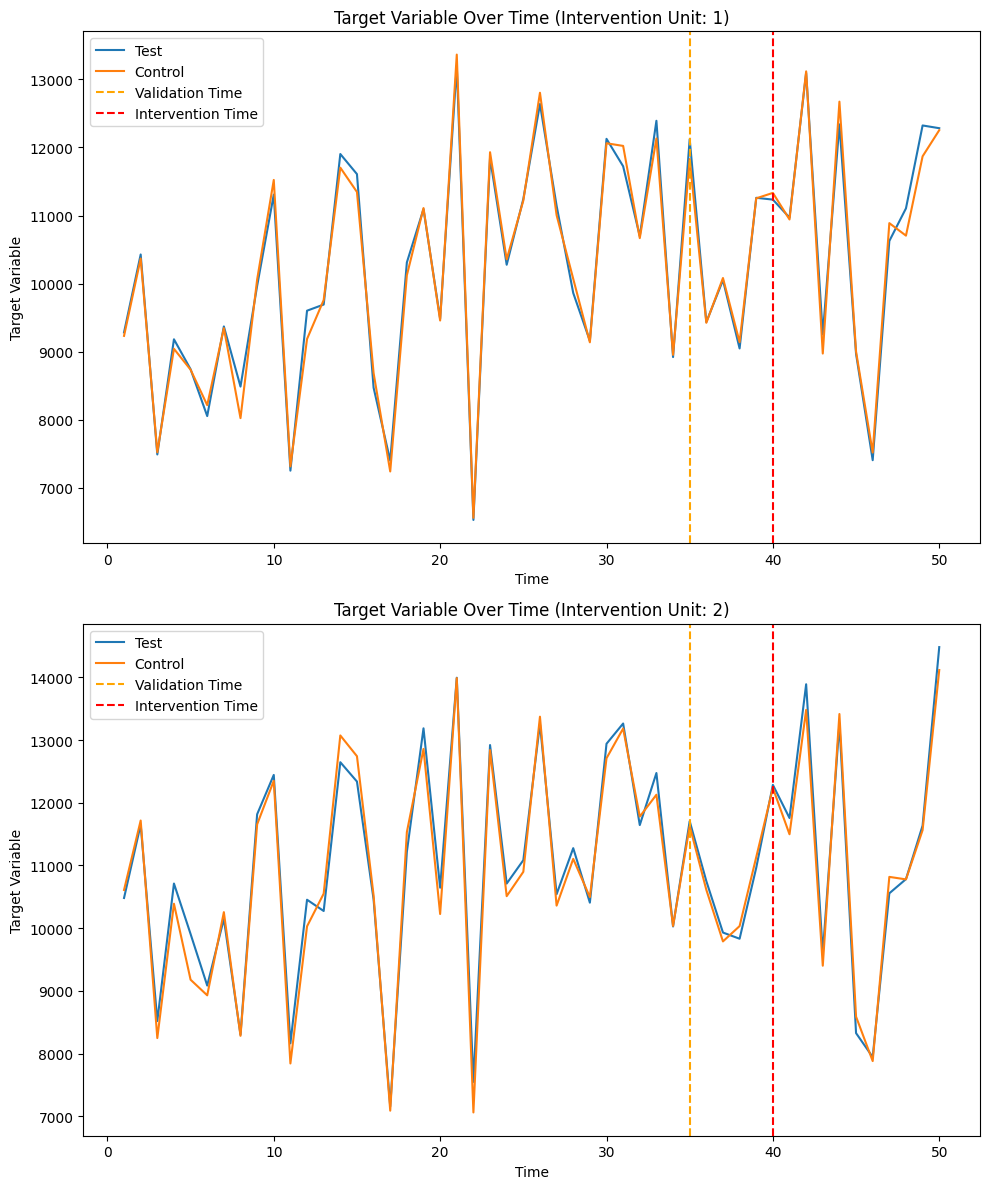

In [14]:
sc.plot()

In [15]:
sc.estimate_effects()

[0.001195896818661032, -0.0022736929853219554]

In [16]:
sc.validation_differences()

[0.0019489751221665518, -0.008759085248505754]

In [17]:
sc.paired_ttest()

[{'intervention_unit': 1,
  'p_value_in_training': 0.5532140211726362,
  'p_value_in_intervention': 0.7032677925211561,
  'p_value': 0.401621686328688},
 {'intervention_unit': 2,
  'p_value_in_training': 0.04429880077662738,
  'p_value_in_intervention': 0.35106777036223547,
  'p_value': 0.028233465884682573}]